<a href="https://colab.research.google.com/github/nm24781-cyber/Android-Library-Management/blob/master/IDS_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We import the NumPy library to work with arrays and random number generation.

The generate_random_points function takes two arguments: n (the number of points to generate) and d (the dimensionality of each point).

Inside the function, we use np.random.rand(n, d) to generate a NumPy array of shape (n, d). Each element of this array is a random value between 0 and 1. You can adjust the range and distribution of random values based on your requirements.

The generated random points are returned as a NumPy array.

In the example usage at the end of the program, we generate 10 random 3-dimensional points and print them to the console. You can modify n and d as needed for your specific application.

In [ ]:
import numpy as np

def generate_random_points(n, d, lower_limit=0, upper_limit=100):
    """
    Generate n random d-dimensional points.

    Parameters:
    - n: Number of points to generate.
    - d: Dimensionality of each point.

    Returns:
    - A NumPy array of shape (n, d) containing the generated points.
    """
    random_points = np.random.uniform(lower_limit, upper_limit, size=(n,d))
    return random_points

# Example usage:
n = 100  # Number of points
d = 1   # Dimensionality of each point

random_points = generate_random_points(n, d, lower_limit=0, upper_limit=100)
print(random_points)


[[42.79177365]
 [82.79213283]
 [21.84123117]
 [22.29881366]
 [14.74499803]
 [96.35247721]
 [66.10888128]
 [ 2.97617786]
 [38.15522062]
 [67.12800208]
 [47.26389754]
 [81.65195069]
 [20.1243097 ]
 [13.38806954]
 [60.38911996]
 [72.05694478]
 [27.3726735 ]
 [55.9242901 ]
 [46.88532629]
 [73.30285457]
 [11.00570428]
 [92.32691286]
 [34.84752675]
 [10.7891211 ]
 [10.54456948]
 [80.67116769]
 [20.99242049]
 [63.41813954]
 [63.03676503]
 [ 9.40467209]
 [36.88699655]
 [ 9.65161213]
 [61.44152815]
 [63.22860175]
 [91.78992473]
 [42.81874574]
 [91.93407207]
 [68.82867332]
 [40.77046861]
 [ 5.064377  ]
 [ 9.76333318]
 [78.48203953]
 [57.83296827]
 [48.46662413]
 [50.36473922]
 [54.02374118]
 [97.04299816]
 [44.34132388]
 [56.9284794 ]
 [24.10943225]
 [59.57792494]
 [78.4841459 ]
 [68.29102811]
 [ 7.58255509]
 [89.99719383]
 [71.934609  ]
 [53.34914957]
 [11.2374649 ]
 [93.39075842]
 [86.49317726]
 [11.48767803]
 [75.32435674]
 [91.66173519]
 [48.11852282]
 [69.16099677]
 [12.57256356]
 [78.99999

In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points.

    Parameters:
    - point1: A NumPy array representing the first point.
    - point2: A NumPy array representing the second point.

    Returns:
    - The Euclidean distance between point1 and point2.
    """
    return np.linalg.norm(point1 - point2)

def max_min_distances(points):
    """
    Compute the maximum and minimum distances between all pairs of points using Euclidean distance.

    Parameters:
    - points: A NumPy array of shape (n, d), where n is the number of points, and d is the dimensionality.

    Returns:
    - max_distance: The maximum distance between any two points.
    - min_distance: The minimum distance between any two distinct points.
    """
    n = len(points)
    max_distance = -1  # Initialize with a negative value
    min_distance = float('inf')  # Initialize with positive infinity

    # Compute distances between all pairs of points
    for i in range(n):
        for j in range(i + 1, n):
            distance = euclidean_distance(points[i], points[j])
            max_distance = max(max_distance, distance)
            min_distance = min(min_distance, distance)

    return max_distance, min_distance

max_dist, min_dist = max_min_distances(random_points)
print(f"Maximum Distance: {max_dist}")
print(f"Minimum Distance: {min_dist}")


Maximum Distance: 97.76448856165527
Minimum Distance: 0.0021063669679648456


We have used log with base 10 for the below calculation

In [ ]:
import math

# Replace these values with your calculated max and min distances
# max_distance = 10.0
# min_distance = 2.0


# Calculate the expression
def eta_function(max_dist, min_dist):
    result = math.log(((max_dist - min_dist) / min_dist), 10)
    return result


# print("Result:", result)


ValueError: ignored

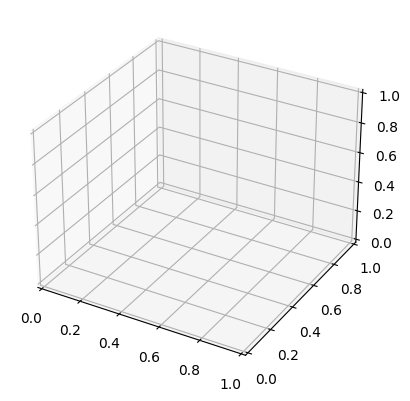

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of values for n and d
n_values = np.arange(100, 1001, 100)  # Range of n: 100 to 1000
d_values = np.arange(1, 101)          # Range of d: 1 to 100

gamma_values = np.empty((len(n_values), len(d_values)))
for i in range(len(n_values)):
    for j in range(len(d_values)):
        random_points = generate_random_points(n_values[i], d_values[j])
        max_dist, min_dist = max_min_distances(random_points)
        result = eta_function(max_dist, min_dist)
        gamma_values[i, j] = result




# Create a grid of (n, d) pairs using meshgrid
n_grid, d_grid = np.meshgrid(n_values, d_values)

# Define the function γ(d, n) (replace with your specific formula)
# def gamma_function(d, n):
    # return d * n  # Replace with your actual formula

# Calculate γ(d, n) for all (n, d) pairs
# gamma_values = gamma_function(d_grid, n_grid)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(n_grid, d_grid, gamma_values, cmap='viridis')

# Add labels and title
ax.set_xlabel('n')
ax.set_ylabel('d')
ax.set_zlabel('γ(d, n)')
plt.title('3-D Surface of γ(d, n)')

# Show the plot
plt.show()

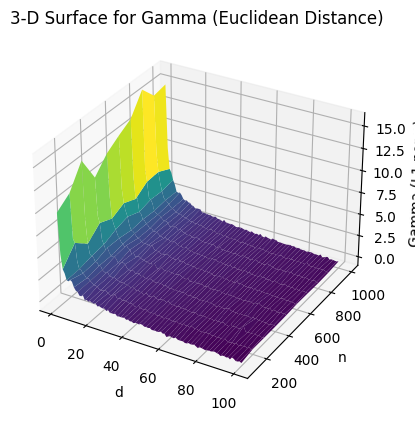

In [ ]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_points(n, d):
    return np.random.rand(n, d) * 100

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def compute_gamma_euclidean(n, d):
    points = generate_random_points(n, d)
    max_distance = 0
    min_distance = np.inf

    for pair in combinations(points, 2):
        distance = euclidean_distance(pair[0], pair[1])
        max_distance = max(max_distance, distance)
        min_distance = min(min_distance, distance)

    gamma = np.log((max_distance - min_distance) / min_distance)
    return gamma

n_values = range(100, 1001, 100)
d_values = range(1, 101)
gamma_values_euclidean = np.zeros((len(n_values), len(d_values)))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        gamma_values_euclidean[i][j] = compute_gamma_euclidean(n, d)

# Create 3-D mesh grid for plotting with N and D transposed
N, D = np.meshgrid(d_values, n_values)

# Create a 3-D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, D, gamma_values_euclidean, cmap='viridis')

# Set labels for axes
ax.set_xlabel('d')
ax.set_ylabel('n')
ax.set_zlabel('Gamma (Euclidean)')

# Set title for the plot
plt.title('3-D Surface for Gamma (Euclidean Distance)')

# Show the plot
plt.show()

# L1 norm

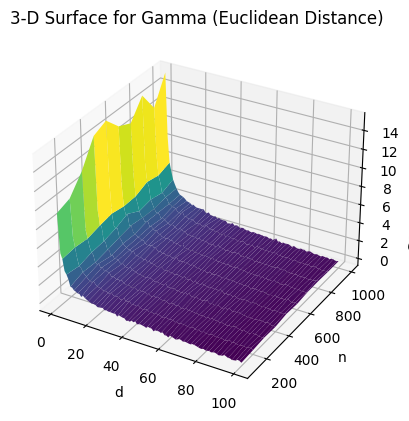

In [ ]:
# Note check l1 norm calculations once i.e distance between two vectors using l1 norm
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_points(n, d):
    return np.random.rand(n, d) * 100

def l1_norm_distance(point1, point2):
    return np.linalg.norm(point1 - point2, ord=1)

def compute_gamma_euclidean(n, d):
    points = generate_random_points(n, d)
    max_distance = 0
    min_distance = np.inf

    for pair in combinations(points, 2):
        distance = l1_norm_distance(pair[0], pair[1])
        max_distance = max(max_distance, distance)
        min_distance = min(min_distance, distance)

    gamma = np.log((max_distance - min_distance) / min_distance)
    return gamma

n_values = range(100, 1001, 100)
d_values = range(1, 101)
gamma_values_euclidean = np.zeros((len(n_values), len(d_values)))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        gamma_values_euclidean[i][j] = compute_gamma_euclidean(n, d)

# Create 3-D mesh grid for plotting with N and D transposed
N, D = np.meshgrid(d_values, n_values)

# Create a 3-D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, D, gamma_values_euclidean, cmap='viridis')

# Set labels for axes
ax.set_xlabel('d')
ax.set_ylabel('n')
ax.set_zlabel('Gamma (Euclidean)')

# Set title for the plot
plt.title('3-D Surface for Gamma (Euclidean Distance)')

# Show the plot
plt.show()

In [ ]:
import numpy as np
result = np.random.rand(10, 2)*100
print(result)

[[71.72591767 51.37618246]
 [43.14829291 42.07405529]
 [88.20566808 22.85432313]
 [22.77058198 42.68834611]
 [22.65167834 18.59946833]
 [78.91807502 22.28925728]
 [63.33304627 83.98460377]
 [70.95341933 93.54996817]
 [71.32911584 96.24933419]
 [97.11693357 25.36022901]]


# Problem 5

Download the dataset (in Data Folder > iris.data). The dataset contains the information
gathered on three types of iris plant: Iris Setosa, Iris Versicolour, and Iris Virginica. To see
if different types of Iris plants are distinguishable from one another, we can just visualize our
dataset. The Iris dataset is a four dimensional dataset; therefore, it cannot be visualized in 2D
or 3D.
* Apply PCA to the dataset and reduce the dimensionality to two.
* Plot the dimensionality reduced dataset. Color data points based on their plant type (e.g., Iris-setosa can be red,
etc.).
* The plant type is given as the fifth column in the dataset. The figure should show the type(s) that can be easily distinguished from others.
* Which Iris type is the easiest to distinguish from the rest? Submit your code and plot.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [ ]:
iris_data = pd.read_csv("/content/iris.data")

# Assigning column names
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data['class'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

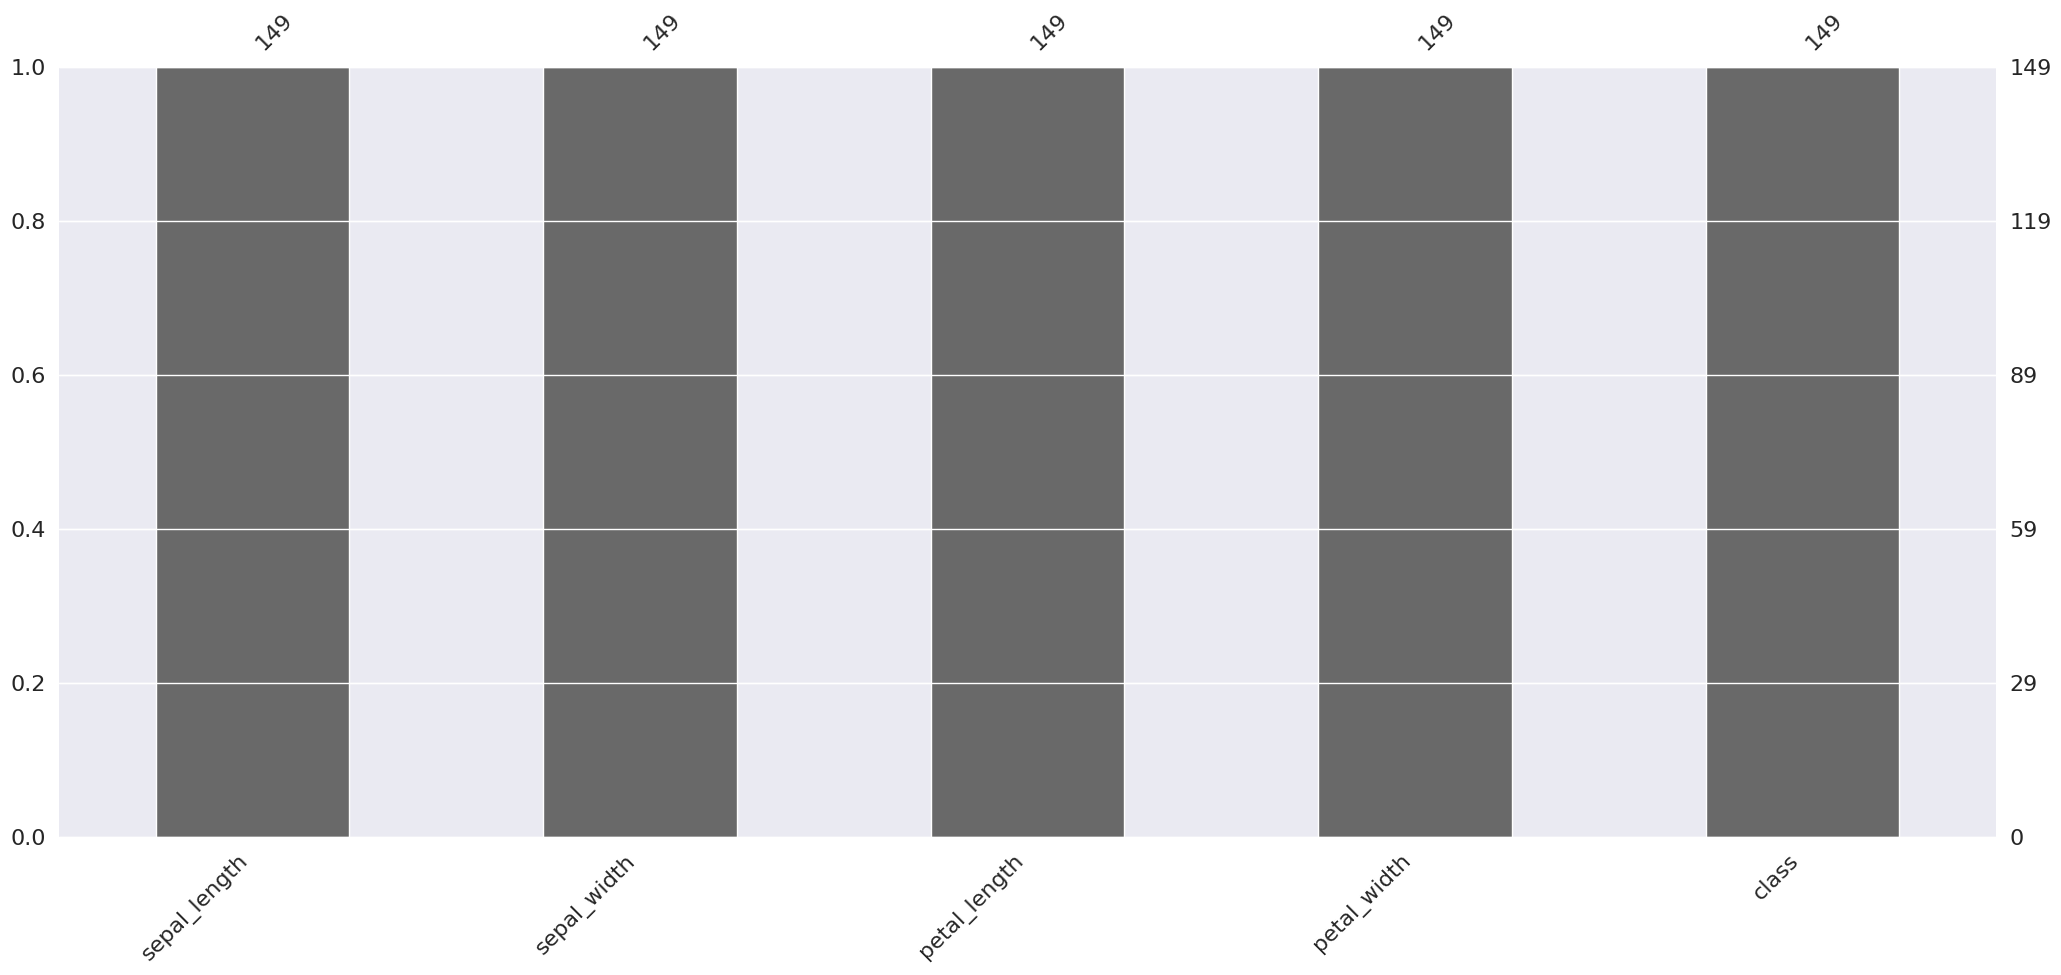

In [ ]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(iris_data)

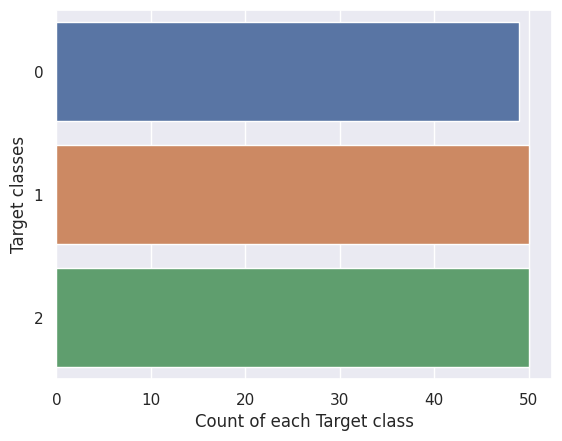

In [ ]:
sns.countplot(y=iris_data['class'] ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

Early Insights :
* 149 rows
* 4 Independent variables to act as factors
* All have same units of measurement
* No missing data
* Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
* No class imbalance, all target classes have equal number of rows (50 each).

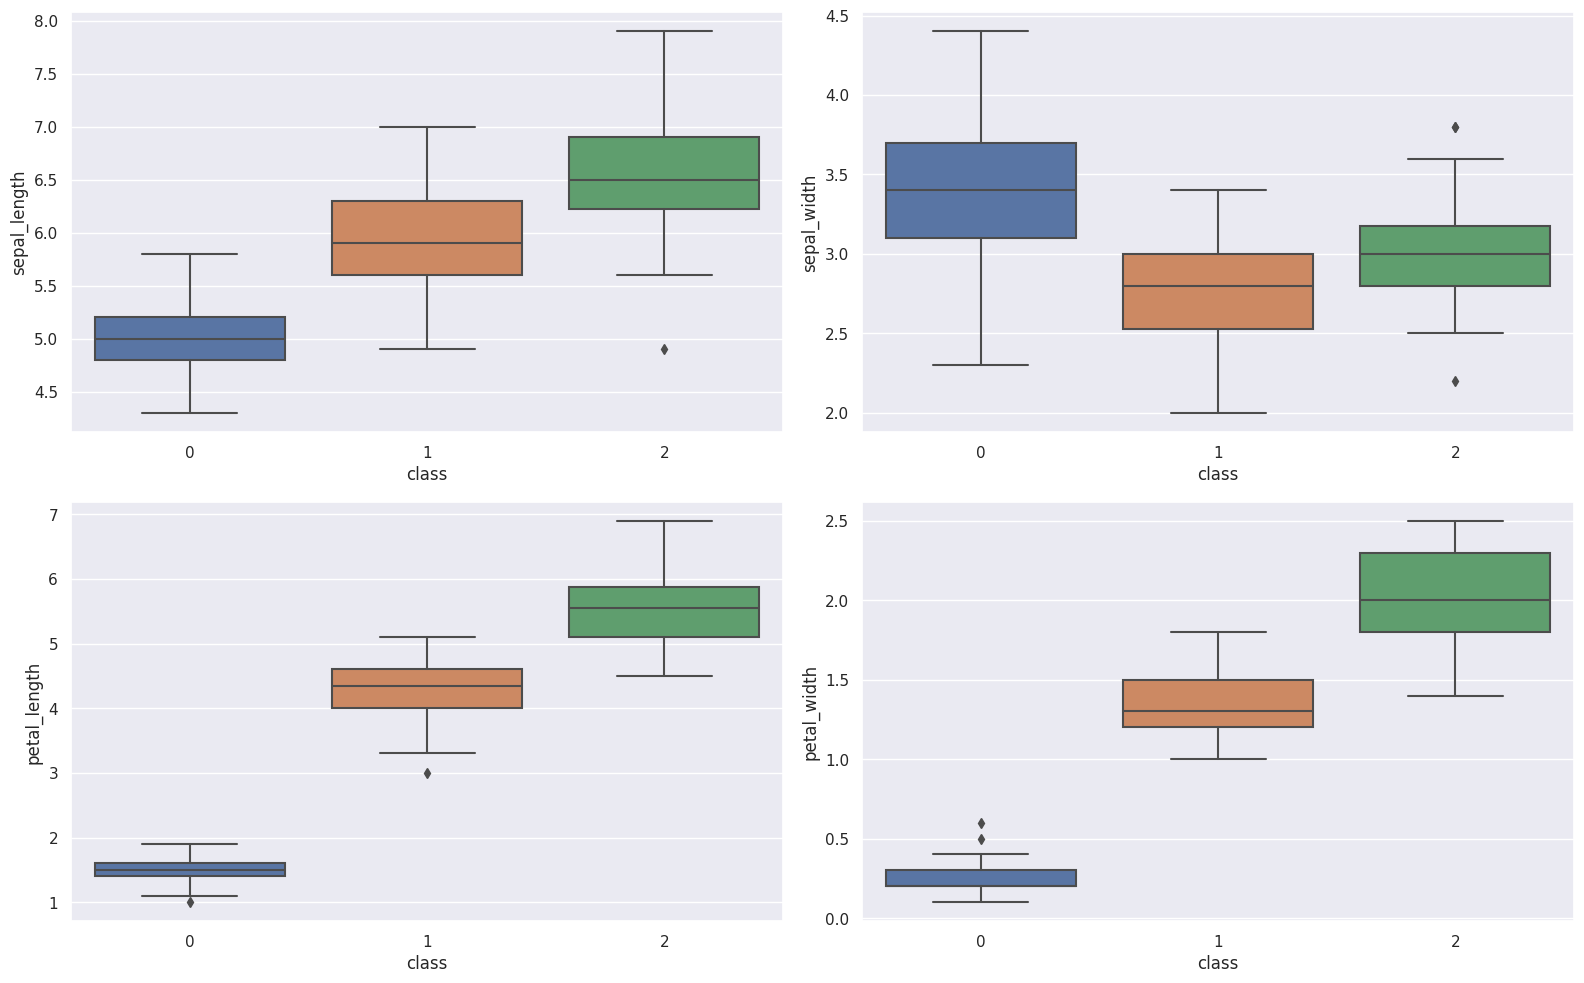

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns)-1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['class'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

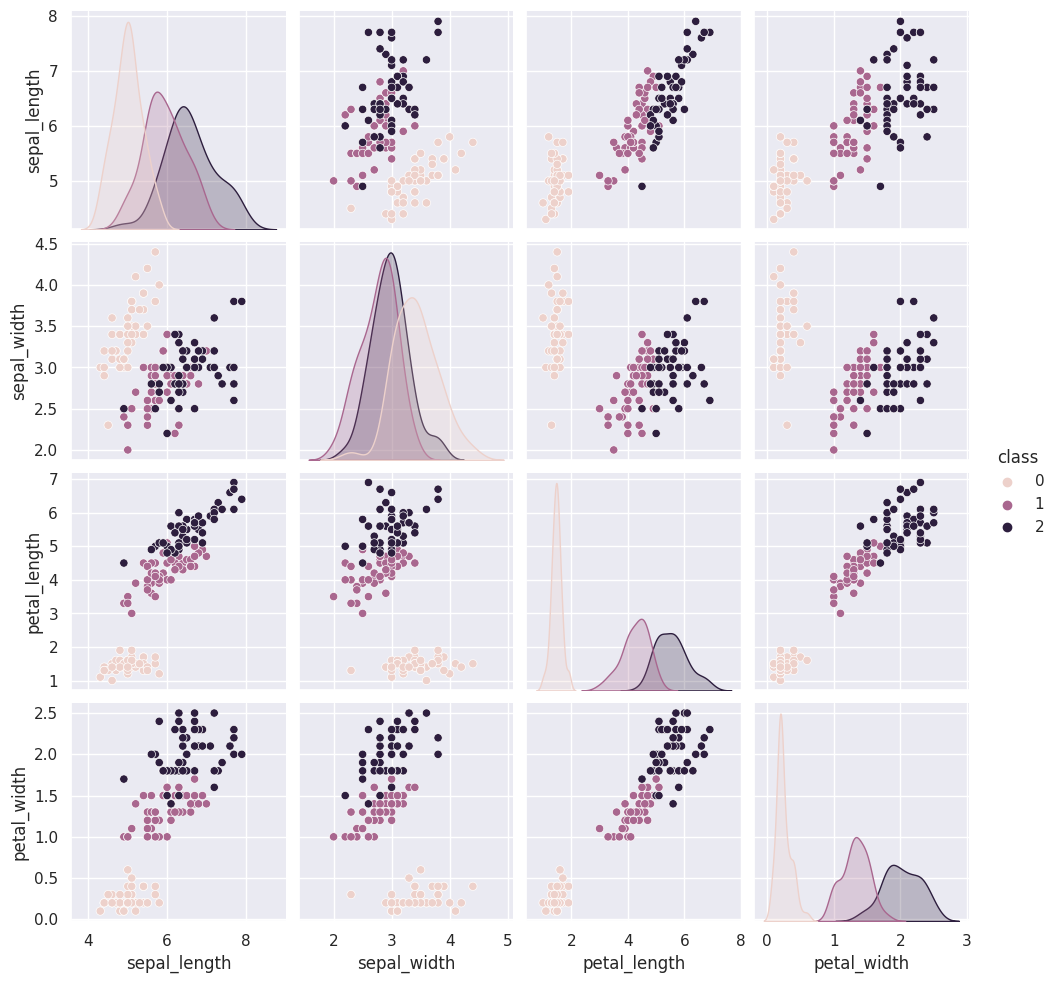

In [ ]:
p=sns.pairplot(iris_data, hue = 'class')

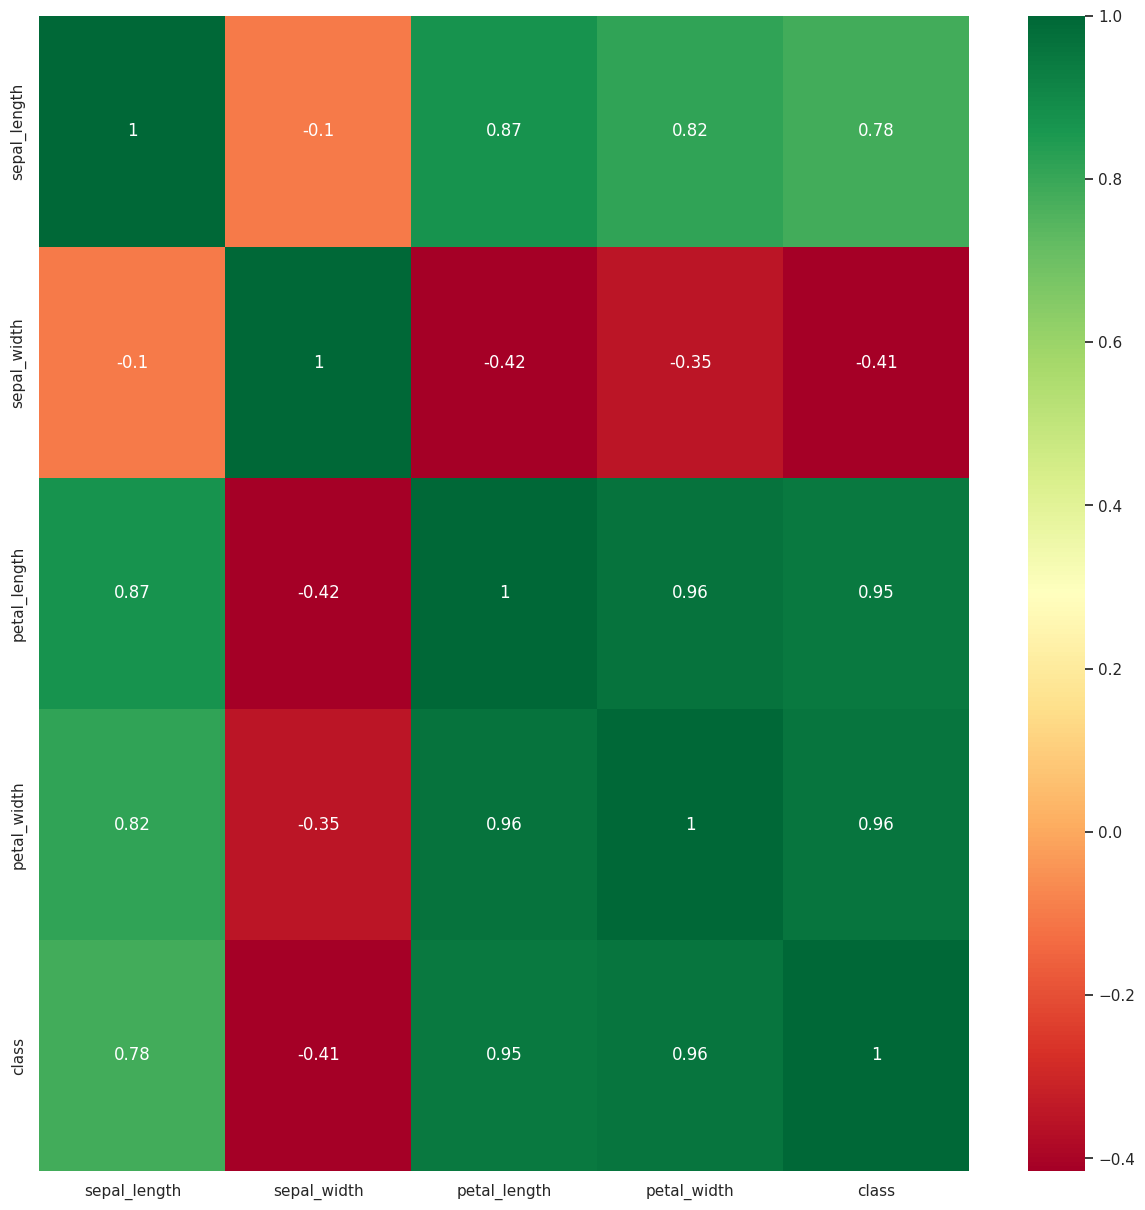

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn')

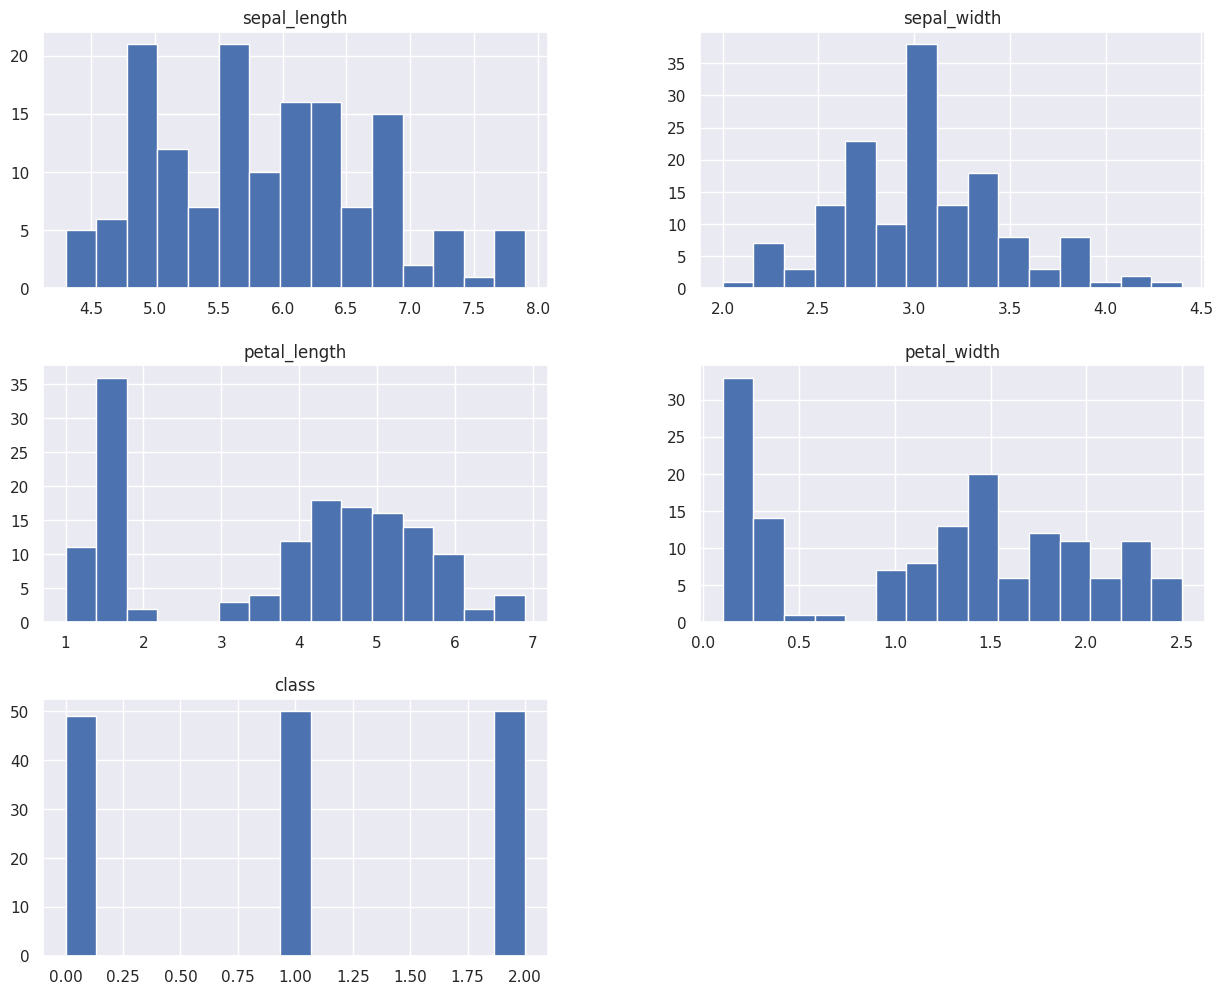

In [ ]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
X = iris_data.drop(['class'],axis=1)
y = iris_data['class']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 0.68656811, -0.0372787 ,  1.27036233,  0.51534691],
       [-0.0372787 ,  0.18792128, -0.31673091, -0.11574868],
       [ 1.27036233, -0.31673091,  3.09637221,  1.28912434],
       [ 0.51534691, -0.11574868,  1.28912434,  0.57956557]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92395437, 0.05343362, 0.01737228, 0.00523974])

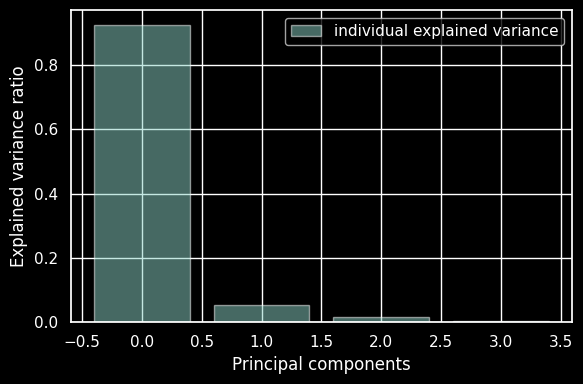

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9615384615384616 %
Test score after PCA 0.9333333333333333 %


In [ ]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

ValueError: ignored

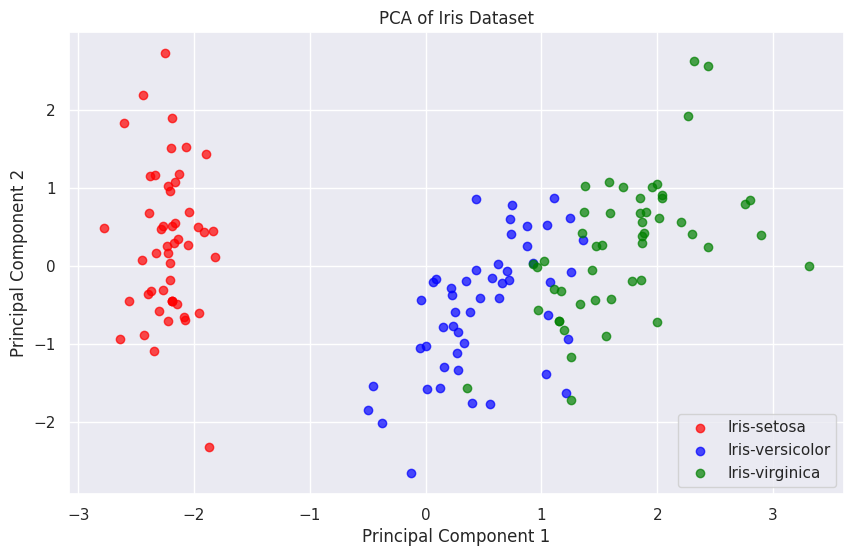

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (assuming you've uploaded it to your environment)
data = pd.read_csv('/content/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Extract features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data['species']

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Create a dictionary to map species to colors
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Plot the dimensionality-reduced dataset
plt.figure(figsize=(10, 6))
for species, color in species_colors.items():
    plt.scatter(pca_df[pca_df['species'] == species]['PC1'],
                pca_df[pca_df['species'] == species]['PC2'],
                label=species,
                color=color,
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()